# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [1]:
from HODDIES.hod import HOD

# Using abacus simulation at NERSC

In [2]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml

HOD_obj= HOD(path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:11
Compute columns...
Done took  00:00:01
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:13


In [3]:
# All parameters from the parameter file are set here
HOD_obj.hcat

Catalog(csize=48043269, size=48043269, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

# Using a custom halo catalog

In [4]:
# Initialise the HOD instance with a given halo catalog. The catalog must be a structed array-like with at least columns names ['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id']

HOD_obj= HOD(hcat=HOD_obj.hcat, boxsize=1000)


Set number of threads to 32
Halo catalog initialized with boxsize of lenght 1000


In [ ]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: GHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [5]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'SHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': None}


In [6]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 13.360857248306274
Start satellite assignement


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:495: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "utils.py", line 411:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=

Satellite assignement done 5.956930875778198
LRG mock catalogue done 6.134176731109619
258732 central galaxies, 740063 satellites, fraction of satellite 0.74 
Done overall time  LRG 20.655712604522705
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 12.130899906158447
Start satellite assignement
Satellite assignement done 0.6123220920562744
ELG mock catalogue done 0.752737283706665
461208 central galaxies, 537662 satellites, fraction of satellite 0.54 
Done overall time  ELG 27.09380793571472


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.3288888931274414
Start satellite assignement
Satellite assignement done 0.4202389717102051
ELG mock catalogue done 0.5541911125183105
459481 central galaxies, 538505 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.681368112564087


(Catalog(csize=1997665, size=1997665, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 Catalog(csize=997986, size=997986, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']))

In [7]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens.size)


Density fixed to  0.001 ELG catalogue size: 997986
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3950626850128174
Start satellite assignement
Satellite assignement done 0.9044632911682129
ELG mock catalogue done 1.2372336387634277
1015305 central galaxies, 1184332 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.292147397994995
ELG catalogue size without density constrain: 2199637


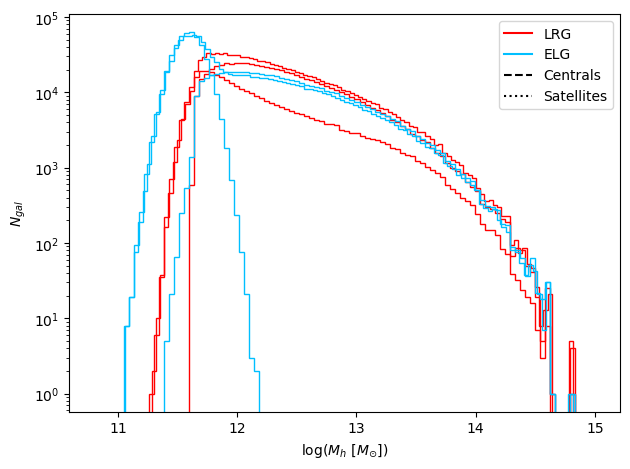

In [8]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


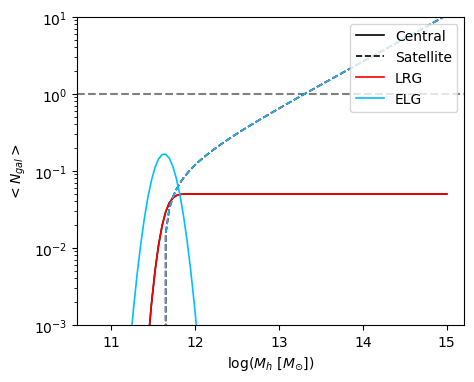

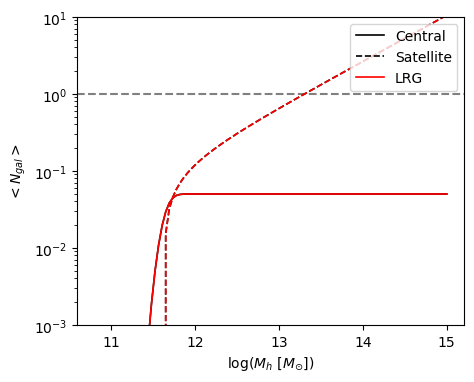

In [9]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [10]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [11]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Computing wp for ELG...


#wp for ELG computed !time = 0.225 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.808 s


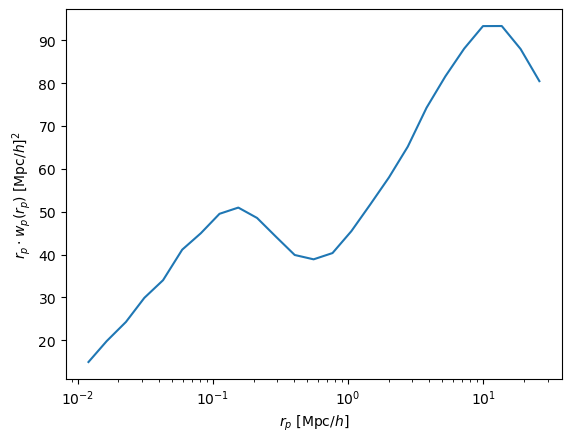

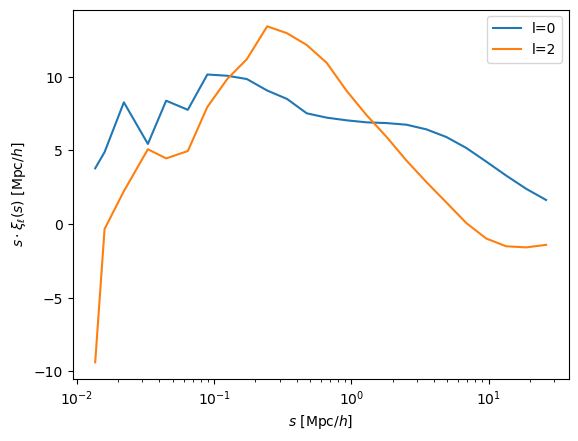

In [12]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [13]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG') for ii in np.random.randint(0,2**32, size=10)]


Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 1.4929478168487549
Start satellite assignement


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Satellite assignement done 2.854050636291504
ELG mock catalogue done 3.170738935470581
1014103 central galaxies, 1185021 satellites, fraction of satellite 0.54 
Done overall time  ELG 5.116169691085815
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3942546844482422
Start satellite assignement
Satellite assignement done 0.9163501262664795
ELG mock catalogue done 1.2558176517486572
1013707 central galaxies, 1185487 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.1277289390563965
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.29703688621520996
Start satellite assignement
Satellite assignement done 0.855994701385498
ELG mock catalogue done 1.1774466037750244
1013930 central galaxies, 1184801 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.2072885036468506
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.2540712356567383
Start satellite assignement
Satellite assigneme

#Computing wp for ELG...


#wp for ELG computed !time = 0.432 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.455 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.445 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.445 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.452 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.564 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.519 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.494 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.498 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.486 s


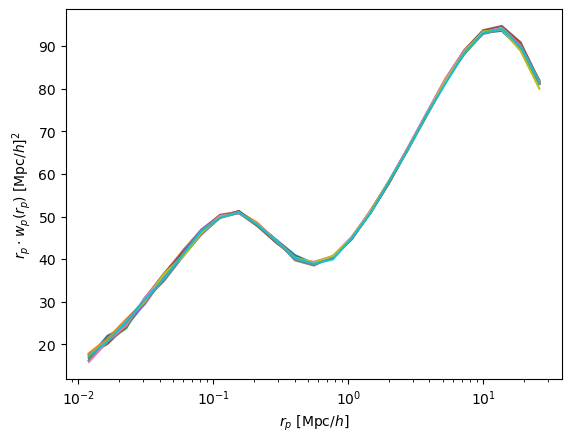

#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.467 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.466 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.456 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.461 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 2.939 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.433 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.454 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.431 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.432 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.439 s


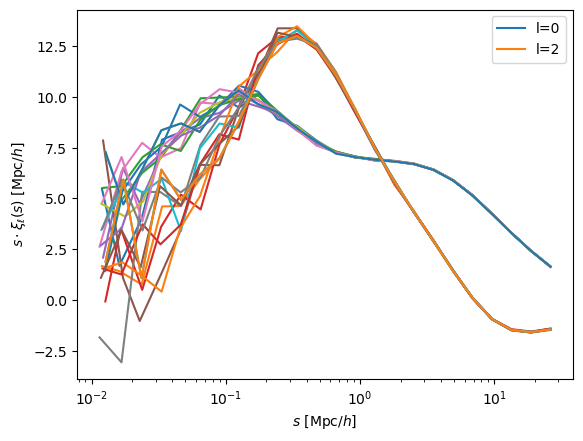

In [14]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

False

# Use particles for satelittes instead of NFW

In [15]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:12
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:13


In [16]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles, so it might no work with 2Gpc/h box
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.3184084892272949
Start satellite assignement
Satellite assignement done 0.572068452835083
LRG mock catalogue done 0.7022840976715088
258864 central galaxies, 740958 satellites, fraction of satellite 0.74 
Done overall time  LRG 1.4925122261047363
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.605637550354004
Start satellite assignement
Satellite assignement done 0.42316412925720215
ELG mock catalogue done 0.5673253536224365
460017 central galaxies, 538336 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.998398542404175


Catalog(csize=1998175, size=1998175, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [17]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.40048670768737793
Start satellite assignement
Satellite assignement done 0.5377755165100098
LRG mock catalogue done 0.6622276306152344
257812 central galaxies, 739121 satellites, fraction of satellite 0.74 
Done overall time  LRG 1.5204391479492188
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.6882917881011963
Start satellite assignement
Satellite assignement done 0.4170198440551758
ELG mock catalogue done 0.5431621074676514
460749 central galaxies, 537733 satellites, fraction of satellite 0.54 
Done overall time  ELG 3.1245791912078857


Catalog(csize=1995415, size=1995415, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [35]:
HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Computing wp for ['ELG' 'ELG']...
#wp for ['ELG' 'ELG'] computed !time = 0.389 s
#Computing wp for ['ELG' 'LRG']...
#wp for ['ELG' 'LRG'] computed !time = 0.386 s
#Computing wp for ['LRG' 'LRG']...
#wp for ['LRG' 'LRG'] computed !time = 0.403 s


{'ELG_ELG': [array([1.19398650e-02, 1.64510848e-02, 2.26559838e-02, 3.11751783e-02,
         4.27930633e-02, 5.88814097e-02, 8.11857469e-02, 1.11651351e-01,
         1.53596143e-01, 2.11548103e-01, 2.92124963e-01, 4.03667506e-01,
         5.57551989e-01, 7.68447544e-01, 1.05926623e+00, 1.46004588e+00,
         2.01098996e+00, 2.77052121e+00, 3.81708506e+00, 5.25906130e+00,
         7.24412454e+00, 9.97985127e+00, 1.37487107e+01, 1.89405533e+01,
         2.60935734e+01]),
  array([6.01656230e+03, 4.88508579e+03, 3.98462336e+03, 3.10845507e+03,
         2.31592615e+03, 1.67976849e+03, 1.17063536e+03, 7.93145910e+02,
         4.94049861e+02, 2.87976680e+02, 1.70526579e+02, 1.07849399e+02,
         7.72856741e+01, 5.92709652e+01, 4.84082531e+01, 4.01321225e+01,
         3.27939492e+01, 2.69414818e+01, 2.18732165e+01, 1.74637334e+01,
         1.36956916e+01, 1.04015114e+01, 7.64257697e+00, 5.24554561e+00,
         3.42235358e+00])],
 'ELG_LRG': [array([1.19398650e-02, 1.64510848e-02, 2.2655